# Example 1: Classification

## Data & libraries

### Libraries

In [22]:
# Data manipulation
# ==============================================================================

import pandas as pd
import numpy as np
import operator
from joblib import dump
import os 

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Modeling 
# ==============================================================================

from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

### Set Working directory

In [12]:
# Set the working directory

workspace_directory = "/Users/oskyroski/DataScience/MachineLearning/1. Supervised Classication"
os.chdir(workspace_directory)


## 0. Understand the business

In the context of healthcare, the early detection and accurate diagnosis of diabetes are critical for effective disease management and improved patient outcomes. Monitoring physiological variables such as glucose levels, insulin, body mass index (BMI), blood pressure, and others plays a pivotal role in understanding an individual’s risk profile for diabetes. Machine learning models can leverage these variables to identify patterns and associations that might not be immediately apparent to healthcare professionals. By systematically analyzing these data points, the models can predict the likelihood of diabetes onset, enabling preventive measures or early treatment. This proactive approach can significantly reduce the burden of the disease on patients by potentially preventing complications, decreasing the need for invasive treatments, and lowering healthcare costs. Effective predictive modeling, thus, stands as a powerful tool in modern medicine, offering a data-driven pathway to enhance diabetes care and management.

## 1. Define the problem

### Data Description

In a machine learning project begins with a thorough Data Description, where we must understand the dataset in hand. The Diabetes_prediction dataset contains several medically relevant features such as glucose concentration, insulin levels, blood pressure, BMI, and more, which are critical indicators of an individual's health status

### Objective

Objectives in our context are twofold: to identify the most significant predictors of diabetes and to develop a predictive model that can accurately classify individuals as having a high or low risk of developing diabetes.

### Modeling Approaches

 We aim to employ supervised learning techniques since the dataset includes labeled outcomes—'Diagnosis' indicating positive or negative cases of diabetes. This binary classification problem lends itself well to a variety of algorithms such as logistic regression, support vector machines, random forests, and gradient-boosting machines. We will assess these models based on their accuracy, precision, recall, and the area under the receiver operating characteristic (ROC) curve to ensure the model's robustness and reliability in predicting diabetes. Ultimately, our goal is to create a model that not only predicts the diagnosis accurately but can also serve as a valuable tool for early intervention and management of diabetes.

## 2. Prepare the Data

### Data Gathering

In [16]:
# Load the CSV file
diabetes = pd.read_csv("Diabetes_prediction.csv")

print(diabetes.head())

   Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0            2  115.863387      56.410731      24.336736   94.385783   
1            2   92.490122      70.615520      23.443591  138.652426   
2            1   88.141469      63.262618      23.404364  149.358082   
3            2  108.453101      67.793632      20.751580  108.751638   
4            1  127.849443      94.725685      22.603078   25.269987   

         BMI  DiabetesPedigreeFunction        Age  Diagnosis  
0  26.455940                  0.272682  20.100494          0  
1  23.910167                  0.665160  44.912281          0  
2  21.948250                  0.676022  48.247873          1  
3  24.209304                  0.289636  42.749868          0  
4  32.997477                  0.601315  32.797789          0  


### EDA 

In [17]:
# Descriptive statistics table
desc_table = diabetes.describe().transpose()
desc_table['mode'] = diabetes.mode().iloc[0]
desc_table['missing_values'] = diabetes.isnull().sum()

# Display the descriptive statistics table
print(desc_table)

                           count       mean        std         min        25%  \
Pregnancies               1000.0   1.771000   1.354398    0.000000   1.000000   
Glucose                   1000.0  99.440607  19.470730   30.571402  86.145927   
BloodPressure             1000.0  72.179837  13.882017   31.401487  62.795447   
SkinThickness             1000.0  23.278316   1.173807   19.369987  22.501591   
Insulin                   1000.0  84.582679  74.872733 -165.310033  35.076535   
BMI                       1000.0  25.433600   3.690223   13.548818  23.022715   
DiabetesPedigreeFunction  1000.0   0.449383   0.199334    0.100037   0.283376   
Age                       1000.0  43.281798  14.465398   -0.979804  33.518451   
Diagnosis                 1000.0   0.306000   0.461060    0.000000   0.000000   

                                50%         75%         max        mode  \
Pregnancies                2.000000    3.000000    8.000000    1.000000   
Glucose                   99.458362  11

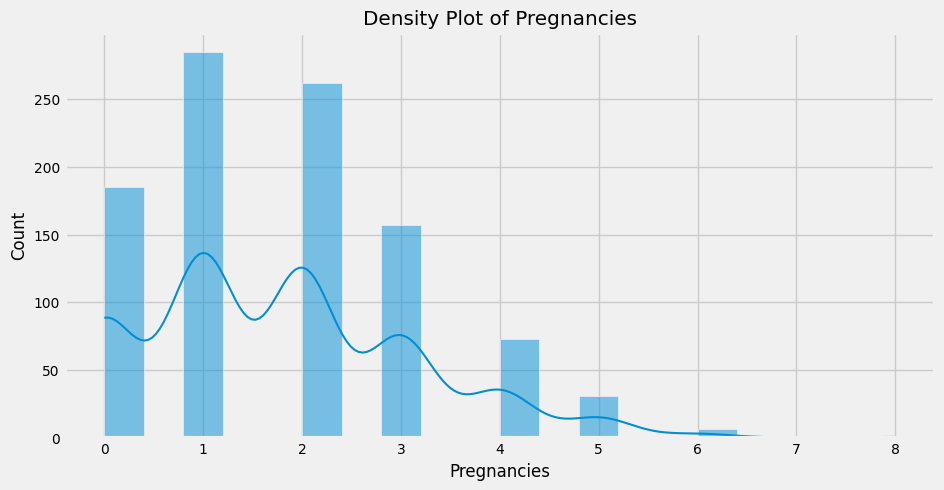

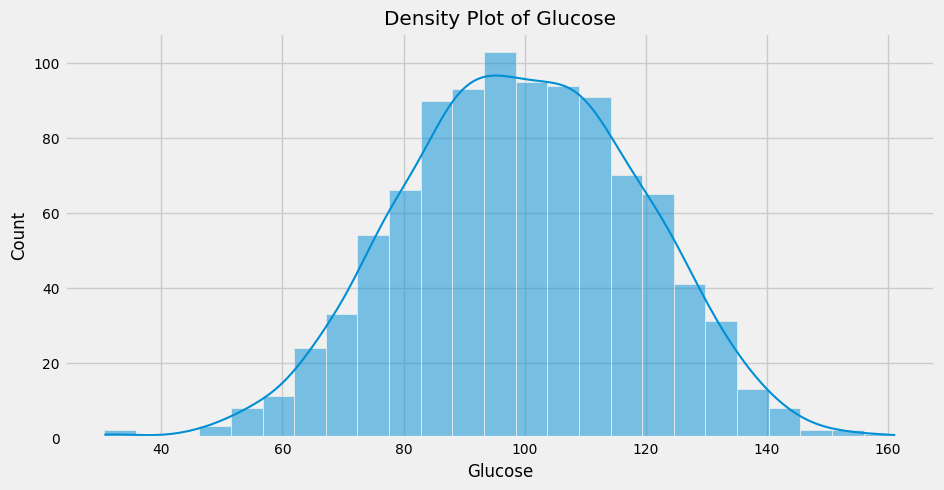

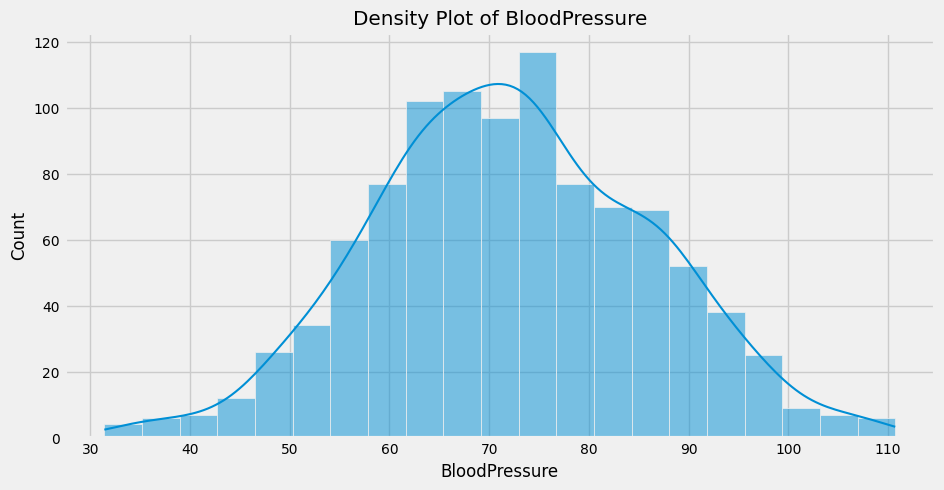

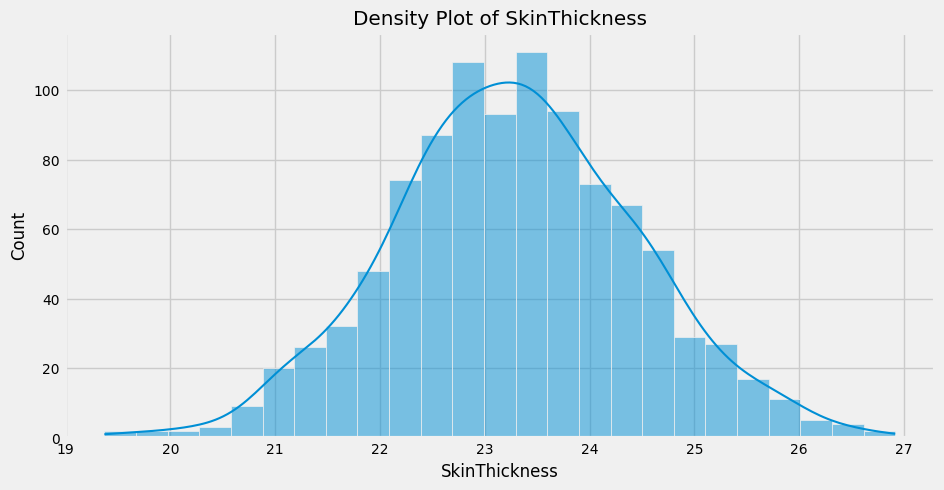

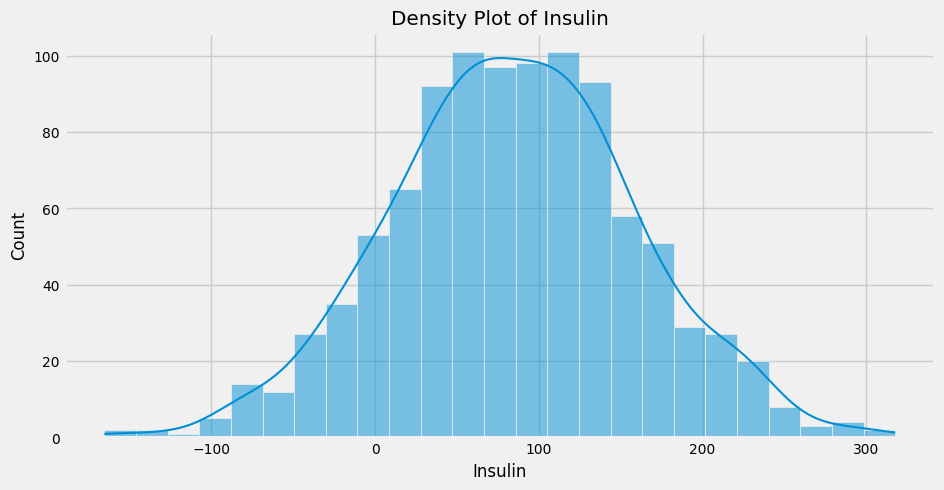

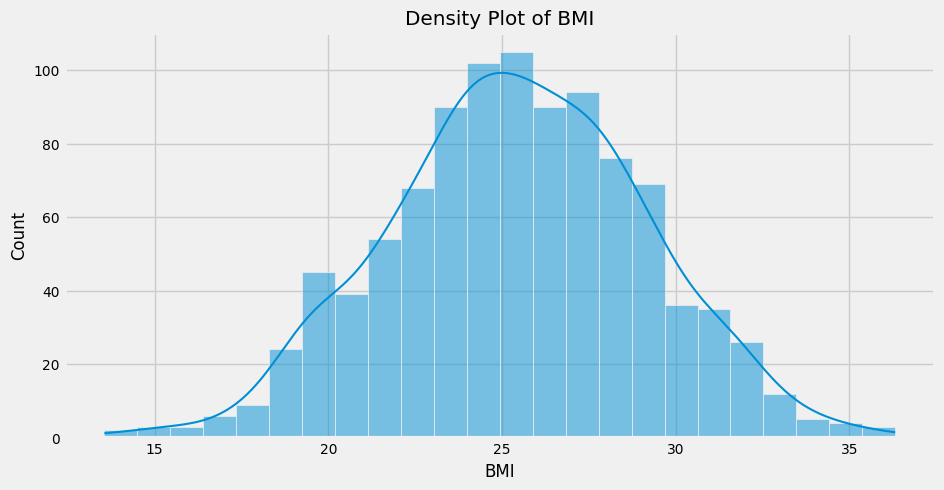

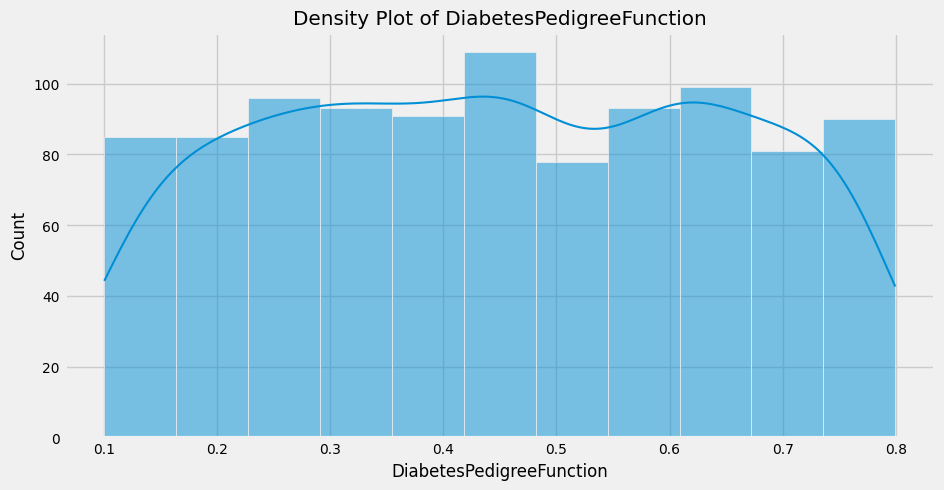

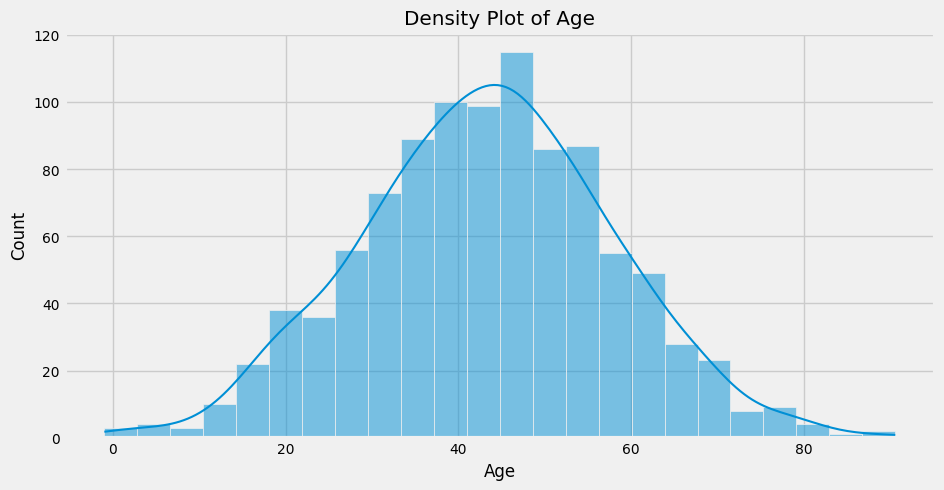

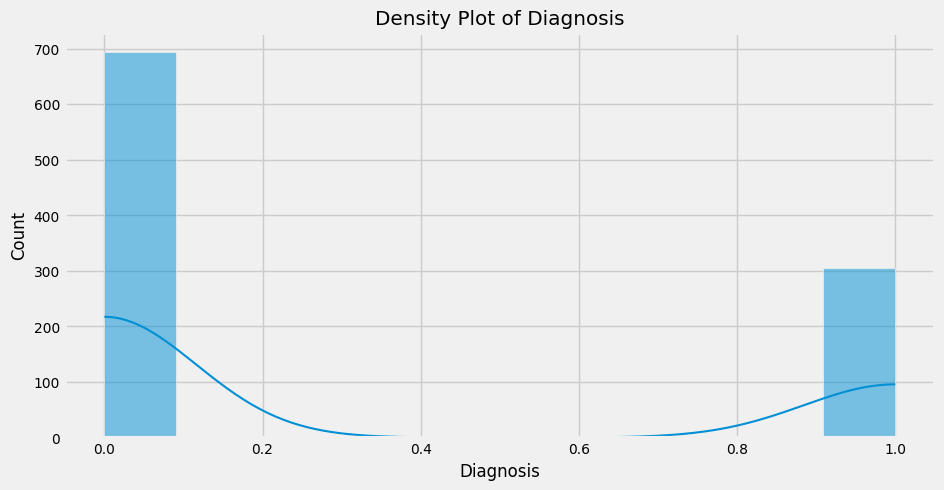

In [23]:
# Plotting cols
for column in diabetes.columns:
    plt.figure(figsize=(10, 5))

    # If the column is numeric, plot a density plot
    if diabetes[column].dtype != 'object':
        sns.histplot(diabetes[column], kde=True)
        plt.title(f'Density Plot of {column}')

    # If the column is categorical, plot a count plot
    else:
        sns.countplot(x=column, data=diabetes)
        plt.title(f'Percentage Plot of {column}')

    plt.show()

### Data Splitting

Let's split the data into  training/testing sets

In [25]:
# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(
    diabetes.drop('Diagnosis', axis=1),  # features
    diabetes['Diagnosis'],               # target variable
    test_size=0.2,                       # 20% validation set
    random_state=545856                     # seed for reproducibility
)

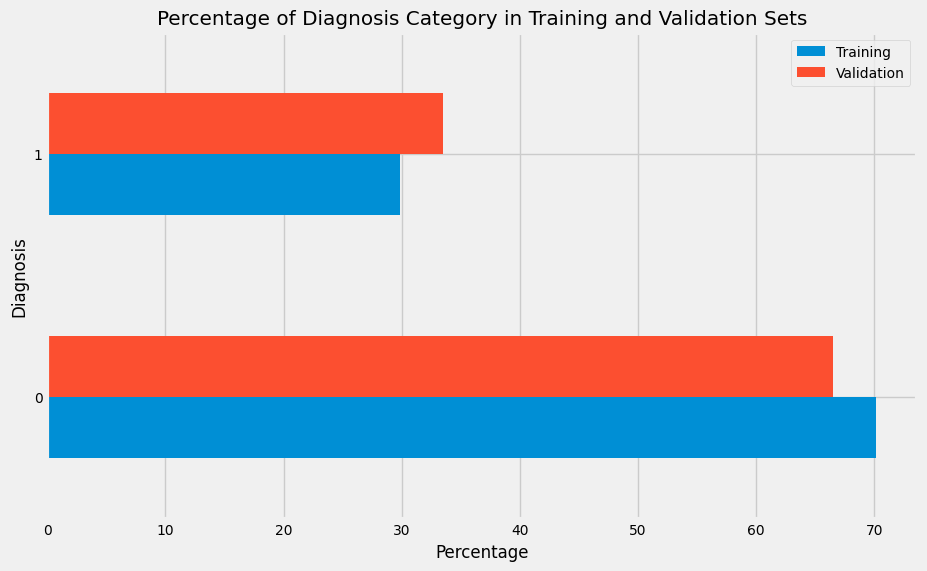

In [28]:
# Now, we calculate the percentage of '0' and '1' in the 'Diagnosis' variable for each set
train_counts = y_train.value_counts(normalize=True) * 100
valid_counts = y_valid.value_counts(normalize=True) * 100

# Prepare the data for plotting
plot_data = pd.DataFrame({'Training': train_counts, 'Validation': valid_counts}).reset_index()
plot_data.rename(columns={'index': 'Diagnosis'}, inplace=True)

# Plotting the data
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data.melt(id_vars='Diagnosis', value_vars=['Training', 'Validation']),
            x='Diagnosis', y='value', hue='variable')
plt.title('Percentage of Diagnosis in Training and Validation Sets')
plt.ylabel('Percentage')
plt.xlabel('Diagnosis')

# Show the plot
plt.show()

## 3. Choose a Model(s)

In the context of classification problems in machine learning, various algorithms can be applied, each with its strengths and applications. Here are eight widely used and powerful methods:

1. Logistic Regression.
2. Decision Trees.
3. Random Forest.
4. Support Vector Machines (SVM).
5. Naive Bayes.
6. K-Nearest Neighbors (KNN).
7. Gradient Boosting Machines (GBM).
8. Neural Networks/Deep Learning.

Each of these algorithms has its specific strengths and may perform differently depending on the nature of the data and the problem

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Instantiate each of the models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = SVC()
model5 = GaussianNB()
model6 = KNeighborsClassifier()
model7 = GradientBoostingClassifier()
model8 = MLPClassifier()

## 4. Train the Model

## 5. Evaluate the Model

## 6. Parameter Tuning

## 7. Make Prediction

## 8.ML Ops

## Session information

In [ ]:
import session_info
session_info.show(html=False)